### <font color='#00d2d3'> Importer les packages

In [1]:
# Importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords') # Télécharger le package stopwords
nltk.download('wordnet')
from nltk.corpus import stopwords # Importer le package stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\morcodou.seck\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\morcodou.seck\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### <font color='#00d2d3'> Importer et lire les données

In [2]:
# Importer les données
df = pd.read_csv('tweet_data.csv')
# Afficher les données
df.head()

,label,tweet
0,1,@user homegrown rightie white americans are 10...
1,1,"@user @user is this a new one? either way, #m..."
2,0,i am thankful for pillows. #thankful #positive...
3,0,it's unfounate today that aids is under contro...
4,0,i am super. #i_am #positive #affirmation


- 1 : Negative
- 0 : Positive

In [3]:
# Dimension des données
df.shape

(4484, 2)

### <font color='#00d2d3'> Pré-traitement des données

In [4]:
# Nombre d'observations dans chaque classe
df.label.value_counts()

label
1    2242
0    2242
Name: count, dtype: int64

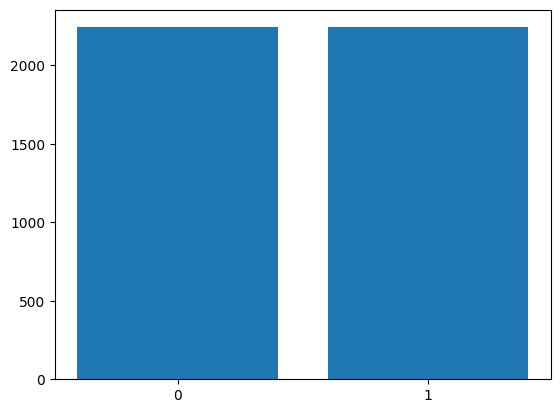

In [5]:
# Bar plot des nombres d'observations dans chaque classe
plt.bar(df.label.value_counts().index, df.label.value_counts().values)
plt.xticks(df.label.value_counts().index)
plt.show()

#### <font color='#00d2d3'> Pré-traitement des données textuelles

In [6]:
# Afficher la première ligne de la colonne text
df['tweet'][0]

'@user homegrown rightie white americans are 100 times more likely to harm you than a refugee.  #fear'

In [7]:
# Afficher la deuxième ligne de la colonne text
df['tweet'][1]

'@user @user  is this a new one? either way, #men disgraced themselves.  #harassment  #verbalassault'

###### <font color='#1dd1a1'> Commencer le nettoyage des tweets


In [8]:
# Fonction supprimant les links
def remove_links(tweet):
    tweet = re.sub(r'http[s]*:?//\S+','', tweet)
    return tweet

In [9]:
# Exemple
tweet ='The urls of my webpages is http://abdoulwahab.com https://abdoul.com'
tweet = remove_links(tweet)
tweet

'The urls of my webpages is  '

In [10]:
# Fonction supprimant les @username
def remove_users(tweet):
   tweet = re.sub(r'@[\w\-\.]+', '', tweet)
   return tweet

In [11]:
# Exemple
tweet ='My username is @abdwahdia'
tweet = remove_users(tweet)
tweet

'My username is '

In [12]:
# Supprimer les adresses emails
def email_address(text):
  tweet = re.sub(r'[\w\-\.]+@[\w\-\.]+', '', text)
  return tweet

In [13]:
# Exemple
tweet ='My email adress is the following : abdoulwahabdiall@gmail.com'
tweet = email_address(tweet)
tweet

'My email adress is the following : '

In [14]:
!pip install contractions


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import contractions
# Fonction étendant les contractions
def contraction(tweet):
    expanded_all = []
    for word in tweet.split():
        expanded_all.append(contractions.fix(word)) # utiliser la fonction fix de contractions

    expand = ' '.join(expanded_all)
    return expand

In [16]:
# Exemple
tweet ="That's the right thing to do"
tweet = contraction(tweet)
tweet

'That is the right thing to do'

In [17]:
# Supprimer html caractères
def clean_html(text):
  tweet = re.sub(r'&\w+','', text)
  return tweet

In [18]:
# Exemple
tweet ='#world What a shame &amp'
tweet = clean_html(tweet)
tweet

'#world What a shame '

In [19]:
# Remplacer tout ce qui n'est pas chaines de caractères alphabétiques et espace par ' '
def alpha_b(text):
  tweet = re.sub(r'[^a-zA-Z\s]+', ' ', text)
  return tweet

In [20]:
# Exemple
tweet = 'My year of birth is 2050 #happy'
tweet = alpha_b(tweet)
tweet

'My year of birth is    happy'

In [21]:
# Fonction remplaçant les espaces multiples et convertissant majuscules en minuscules
def lower(text):
  tweet = re.sub(r'\s{2,}', ' ', text)
  return tweet.lower()

In [22]:
# Supprimer les espaces en début et fin de tweet
def clean_space(text):
  tweet = re.sub(r'^\s|\s$', '', text)
  return tweet

In [23]:
# Exemple
tweet = ' Life is a mess for some people '
tweet = clean_space(tweet)
tweet

'Life is a mess for some people'

In [24]:
# Fonction supprimant les stopwords
def remove_stopwords(text):
    Stopwords = stopwords.words('english')
    tweet= ' '.join([word for word in text.split() if word not in Stopwords])
    return tweet

In [25]:
# Exemple
tweet = 'Life is a mess for some people'
tweet = remove_stopwords(tweet)
tweet

'Life mess people'

In [26]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
def lem_sw(text):
    tweet = [lemma.lemmatize(word) for word in text.split()]
    tweet = " ".join(tweet)
    return tweet

###### <font color='#1dd1a1'> Appliquer les différentes fonctions sur les tweets



In [27]:
# Appliquer la fonction remove_users
df['new_tweet'] = df.tweet.apply(func = remove_users)
 # Appliquer la fonction remove_links
df['new_tweet'] = df.new_tweet.apply(func = remove_links)
# Appliquer la fonction email_address
df['new_tweet'] = df.new_tweet.apply(func = email_address)
# Appliquer la fonction remove_contraction
df['new_tweet'] = df.new_tweet.apply(func = contraction)
# Appliquer la fonction clean_html
df['new_tweet'] = df.new_tweet.apply(func = clean_html)
# Appliquer la fonction alpha_b
df['new_tweet'] = df.new_tweet.apply(func = alpha_b)
# Appliquer la fonction lower
df['new_tweet'] = df.new_tweet.apply(func = lower)
# Appliquer la fonction clean_space
df['new_tweet'] = df.new_tweet.apply(func =clean_space)
# Appliquer la fonction remove_stopwords
df['new_tweet'] = df.new_tweet.apply(func = remove_stopwords)
# Appliquer la fonction lem_sw
df['new_tweet'] = df.new_tweet.apply(func = lem_sw)

In [28]:
# Afficher df
df.head()

,label,tweet,new_tweet
0,1,@user homegrown rightie white americans are 10...,homegrown rightie white american time likely h...
1,1,"@user @user is this a new one? either way, #m...",new one either way men disgraced harassment ve...
2,0,i am thankful for pillows. #thankful #positive...,thankful pillow thankful positive
3,0,it's unfounate today that aids is under contro...,unfounate today aid control hate kill gay year...
4,0,i am super. #i_am #positive #affirmation,super positive affirmation


In [29]:
# Afficher la ligne d'index 0
df['new_tweet'][0]

'homegrown rightie white american time likely harm refugee fear'

In [30]:
# Afficher la ligne d'index 1
df['new_tweet'][1]

'new one either way men disgraced harassment verbalassault'

### <font color='#00d2d3'> Vectorisation

In [31]:
# Importer les packages
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [32]:
# Nombre de mots
voc_size = len(set(" ".join(df.new_tweet).split()))

# Initialiser le modèle Tokenizer
tokenizer = Tokenizer(num_words=voc_size, split=' ')

# Entrainer les données
tokenizer.fit_on_texts(df['new_tweet'].values)

# Vectoriser
X = tokenizer.texts_to_sequences(df['new_tweet'].values)

# Padding
X = pad_sequences(X)

In [ ]:

# Sauvegarder le tokenizer en JSON
tokenizer_json = tokenizer.to_json()
with open('tokenizer1.json', 'w', encoding='utf-8') as json_file:
    json_file.write(tokenizer_json)


In [33]:
# afficher X
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 3792, 3793,    6,   99,   14, 1380, 1783,  998,  296],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    9,   16,  999,   47,   85, 1784, 1000, 2401],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,   33, 2402,   33,   39],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 3794,   17, 2403,  536,   26,  257,  308, 3795,  111],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  415,   39,  132]])

### <font color='#00d2d3'> Sentiment Analysis avec Bi-directional LSTM

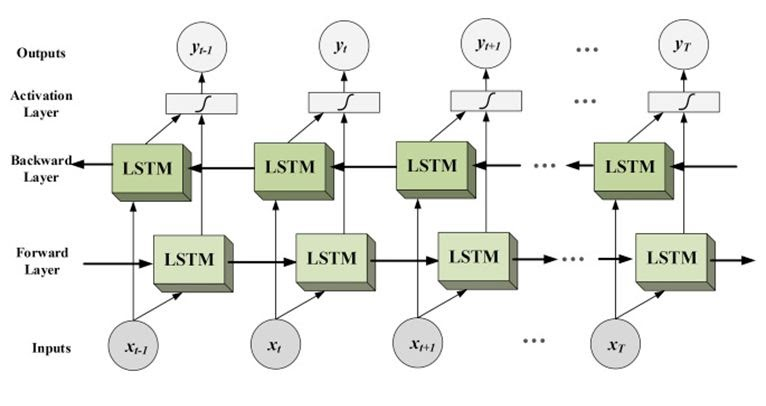

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout

In [35]:
# Dimension des vecteurs
emb_dim=100
model=Sequential()
model.add(Embedding(voc_size, emb_dim, input_length=X.shape[1]))
model.add(Bidirectional(LSTM(200, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(200)))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))
# Compiler le modèle
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Afficher le summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21, 100)           959100    
                                                                 
 bidirectional (Bidirection  (None, 21, 400)           481600    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 21, 400)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 400)               961600    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense (Dense)               (None, 1)                 4

### <font color='#00d2d3'> Sentiment Analysis avec LSTM

In [36]:
# # Dimension des vecteurs
emb_dim=100
model=Sequential()
model.add(Embedding(voc_size, emb_dim, input_length=X.shape[1]))
model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(200))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))
# Compiler le modèle
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Afficher le summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 21, 100)           959100    
                                                                 
 lstm_2 (LSTM)               (None, 21, 200)           240800    
                                                                 
 dropout_2 (Dropout)         (None, 21, 200)           0         
                                                                 
 lstm_3 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 1520901 (5.80 MB)
Trainable params: 1520

In [37]:
# Importer train_test_split
from sklearn.model_selection import train_test_split
# Labels
y = df.label.values

# Splitter en train et test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitter validation et test
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [38]:
# Entrainer le modèle
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64)

Epoch 1/5
57/57 [==============================] - 14s 154ms/step - loss: 0.5883 - accuracy: 0.6454 - val_loss: 0.3411 - val_accuracy: 0.8348
Epoch 2/5
57/57 [==============================] - 9s 154ms/step - loss: 0.1892 - accuracy: 0.9247 - val_loss: 0.2968 - val_accuracy: 0.8705
Epoch 3/5
57/57 [==============================] - 10s 170ms/step - loss: 0.0683 - accuracy: 0.9785 - val_loss: 0.3899 - val_accuracy: 0.8795
Epoch 4/5
57/57 [==============================] - 12s 207ms/step - loss: 0.0283 - accuracy: 0.9880 - val_loss: 0.5138 - val_accuracy: 0.8616
Epoch 5/5
57/57 [==============================] - 15s 266ms/step - loss: 0.0138 - accuracy: 0.9947 - val_loss: 0.5989 - val_accuracy: 0.8817


In [39]:
# Importer accuracy_score
from sklearn.metrics import accuracy_score

# Prédire les labels de x_val
y_pred = model.predict(x_val)

# Arrondir les valeurs
y_pred = np.round(y_pred)

# Afficher l'accuracy
print('Accuracy score', accuracy_score(y_pred, y_val))

14/14 [==============================] - 2s 39ms/step
Accuracy score 0.8816964285714286


###### <font color='#1dd1a1'> Test le modèle

In [40]:
#x_test tweet non vectorisées
# tweet= tokenizer.sequences_to_texts(x_test[4:6])
tweet= ['You are a negative personne, I never like you', 'I like eatting good food when i really hungry']

#x_test tweet vectorisées
# twt=x_test[4:6]
twt=pad_sequences(tokenizer.texts_to_sequences(tweet), X.shape[1])
twt

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0, 1852,   57,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    4,   19,  290,   64, 2229]])

In [41]:
# Prédictions les labels
y_pred= model.predict(twt)
# Arrondir les valeus
y_pred = np.round(y_pred)

1/1 [==============================] - 1s 868ms/step


In [42]:
# Afficher sentiments
for i in range(0,2):
  print(tweet[i],"----",["Negative sentiment" if int(y_pred[i])== 1 else "Positive sentiment"])
  print()

You are a negative personne, I never like you ---- ['Positive sentiment']

I like eatting good food when i really hungry ---- ['Positive sentiment']



### <font color='#00d2d3'> Sentiment Analysis avec Transformers modèle

In [43]:
!pip install transformers


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
# Importer transformers
import transformers

c:\Users\morcodou.seck\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [99]:
# Import pipeline
from transformers import pipeline

# Initialiser le modèle
sentiment_pipeline = pipeline("sentiment-analysis")

# Appliquer le modèle
sentiment_pipeline('I know someone who love dogs')


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9956244826316833}]